In [1]:
%matplotlib inline
# Importing standard Qiskit libraries
import qiskit as q
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from iqx import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [2]:

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(6, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.barrier(qreg_q[0])
circuit.barrier(qreg_q[1])
circuit.barrier(qreg_q[2])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.barrier(qreg_q[0])
circuit.barrier(qreg_q[1])
circuit.barrier(qreg_q[2])
circuit.ccx(qreg_q[0], qreg_q[2], qreg_q[3])
circuit.cx(qreg_q[1], qreg_q[3])
circuit.x(qreg_q[3])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[4])
circuit.ccx(qreg_q[0], qreg_q[2], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[4])
circuit.cx(qreg_q[2], qreg_q[4])
circuit.x(qreg_q[4])
circuit.ccx(qreg_q[0], qreg_q[2], qreg_q[5])
circuit.ccx(qreg_q[1], qreg_q[2], qreg_q[5])
circuit.cx(qreg_q[1], qreg_q[5])
circuit.cx(qreg_q[2], qreg_q[5])
circuit.x(qreg_q[5])
circuit.measure(qreg_q[2], creg_c[2])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[0], creg_c[0])

editor = CircuitComposer(circuit=circuit)
editor

CircuitComposer(circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f005d3a1650>)

In [5]:
provider

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
provider = IBMQ.get_provider('ibm-q') #Code to determine the avaiability of quantum machines on the IBM quantum cloud
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = 'simulator'
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits") 

ibmq_qasm_simulator has 34 queued and simulator qubits
ibmqx2 has 6 queued and 5 qubits
ibmq_16_melbourne has 2932 queued and 15 qubits
ibmq_vigo has 1 queued and 5 qubits
ibmq_ourense has 2 queued and 5 qubits
ibmq_valencia has 21 queued and 5 qubits
ibmq_armonk has 4 queued and 1 qubits
ibmq_athens has 11 queued and 5 qubits
ibmq_santiago has 17 queued and 5 qubits


In [8]:
from qiskit.tools.monitor import job_monitor #Code to create a job, choose a backend, and execute 

backend = provider.get_backend('ibmq_qasm_simulator')

job = q.execute(circuit, backend=backend, shots=500) #500 attempts to measure value and determine probabilities (collapses each time due to superposition)

job_monitor(job)

Job Status: job has successfully run


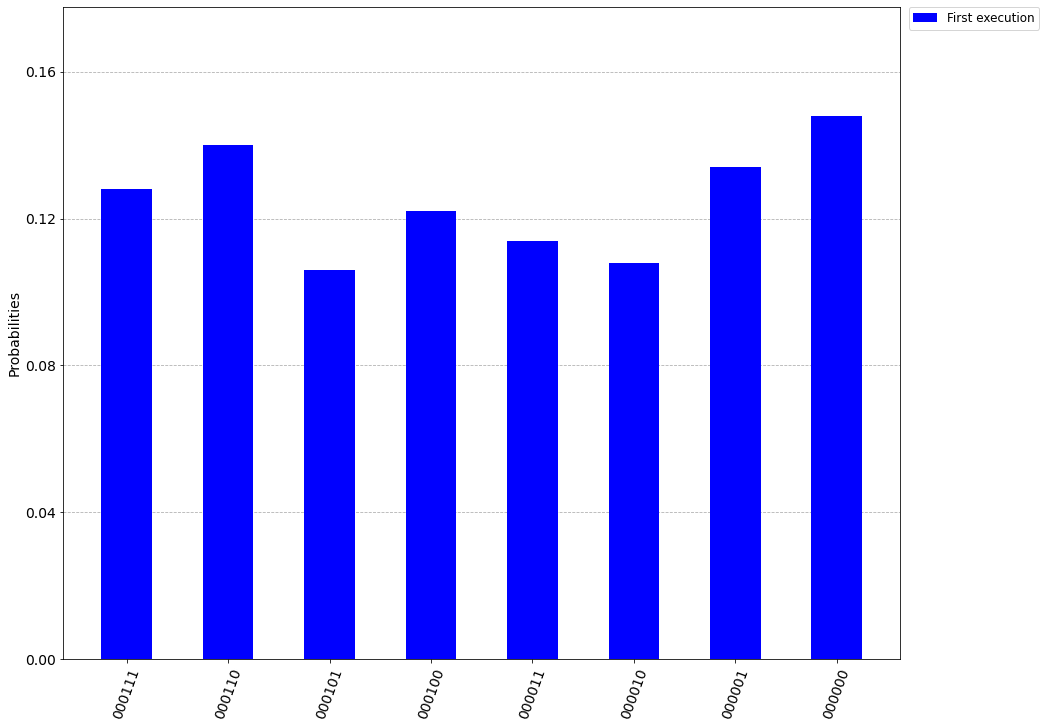

In [9]:
from qiskit.visualization import plot_histogram #Plot histogram of probabilities based on the pre-defined job 
from matplotlib import style


#style.use('dark background')

result = job.result()

counts = result.get_counts(circuit)

#plot_histogram([counts])
legend = ['First execution']
plot_histogram([counts], legend=legend, sort='desc', figsize=(15,12),
               color=['blue'], bar_labels=False)



In [10]:
from qiskit import Aer #Simulator framework for qiskit
from qiskit.visualization import plot_state_city, plot_bloch_multivector #Import various modules to view the quantum state using the
# statevector simulator 
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

backend = Aer.get_backend('statevector_simulator')

result = job.result()



result = execute(circuit, backend).result()
qdb_t  = result.get_statevector(circuit)

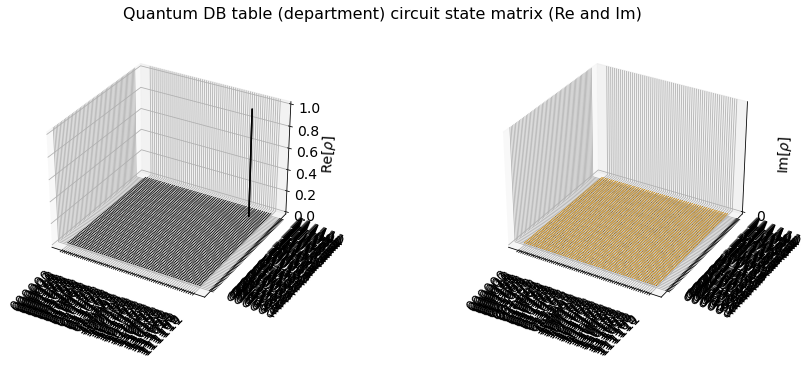

In [12]:
plot_state_city(qdb_t, title="Quantum DB table (department) circuit state matrix (Re and Im)", color=['black', 'orange'])

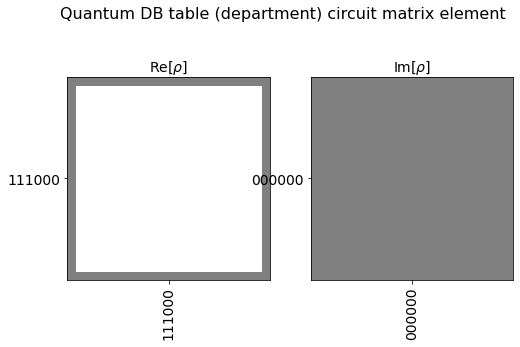

In [13]:
plot_state_hinton(qdb_t, title="Quantum DB table (department) circuit matrix element")

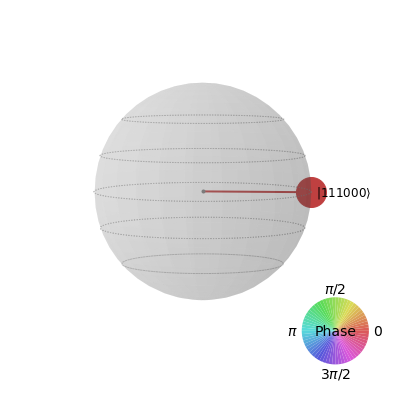

In [14]:
plot_state_qsphere(qdb_t)

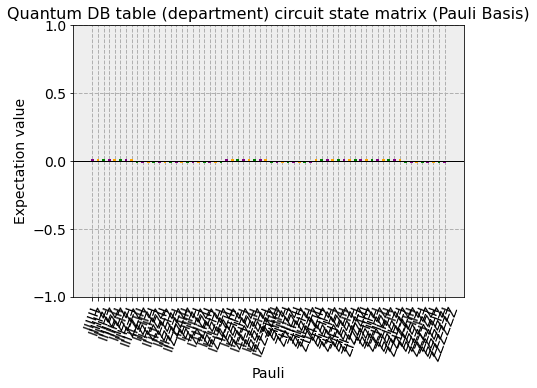

In [15]:
plot_state_paulivec(qdb_t, title="Quantum DB table (department) circuit state matrix (Pauli Basis)", color=['purple', 'orange', 'green'])

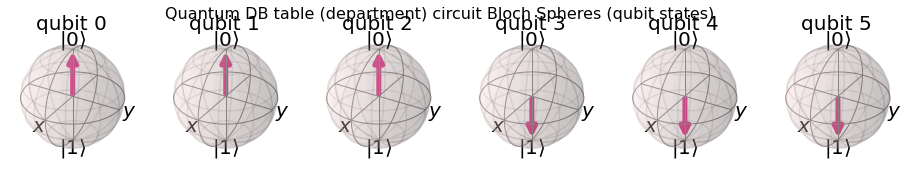

In [18]:
plot_bloch_multivector(qdb_t, title="Quantum DB table (department) circuit Bloch Spheres (qubit states)")